In [1]:
# %pip install matplotlib pandas seaborn

In [ ]:
# %pip install kagglehub

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device=0

print(device)
print(torch.cuda.get_device_name(0))

0
NVIDIA GeForce RTX 4060 Laptop GPU


In [4]:
print(torch.__version__)

2.5.1+cu121


In [5]:
torch.manual_seed(42)

In [6]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Transform (resize + convert to tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize all images to same size
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Datasets
# 2. Load Datasets from folder
Datasets=datasets.ImageFolder(root="/home/aastha_same/Documents/Project to learn/Agriculture_Potato_Disease_Classification_1/Data/PlantVillage/", transform=transform)
# img, label = Datasets[0]

# Class names
classes = Datasets.classes
print("Classes:", classes)

Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


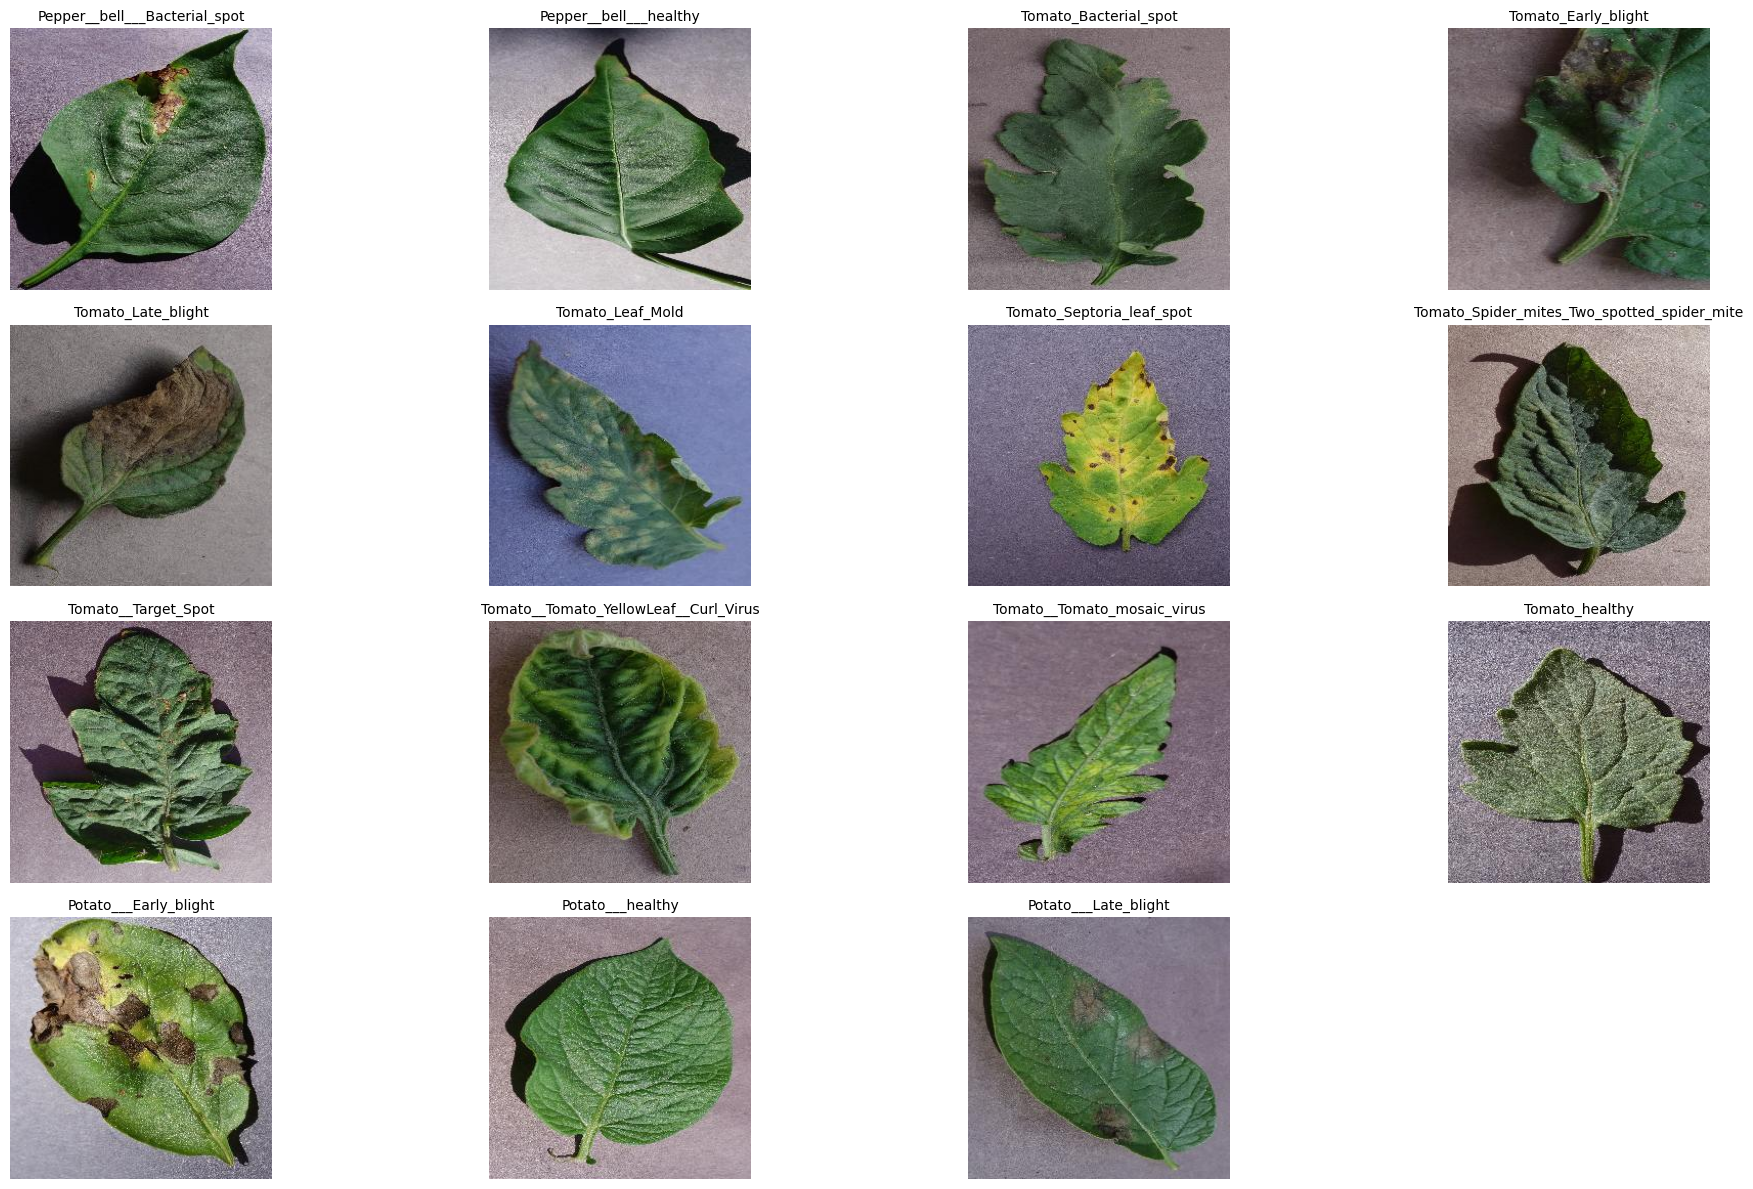

In [7]:
import os
import random
from PIL import Image

data_dir= "/home/aastha_same/Documents/Project to learn/Agriculture_Potato_Disease_Classification_1/Data/PlantVillage/"
classes=os.listdir(data_dir)
plt.figure(figsize=(20,12))
for i ,cls in enumerate(classes):
    cls_path=os.path.join(data_dir,cls)
    img_name=random.choice(os.listdir(cls_path))
    img_path=os.path.join(cls_path,img_name)

    img=Image.open(img_path)

    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.title(cls,fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()

3. Split into Training and Validation Sets --

In [8]:
# 3. Split into train & val
from torch.utils.data import random_split
train_size = int(0.8 * len(Datasets))
val_size = len(Datasets) - train_size

train_dataset, val_dataset = random_split(Datasets, [train_size, val_size])

print("Training images:", len(train_dataset))
print("Validation images:", len(val_dataset))

# 4. Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)

Training images: 16510
Validation images: 4128


In [9]:
for X, y in train_loader:
    print(X.shape, y.shape)
    break


torch.Size([32, 3, 224, 224]) torch.Size([32])


In [10]:
classes

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight']

In [11]:
# --- 5. Inspect a Batch (Optional) ---
# Let's see what the DataLoader gives us.
# next(iter(...)) gets one batch.
images, labels = next(iter(train_loader))

print(f"\n--- Inspecting one batch ---")
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")
print(f"Example labels: {labels}")


--- Inspecting one batch ---
Images batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])
Example labels: tensor([ 8, 12,  9, 10, 11, 12,  6,  9,  1,  1, 13,  3,  5, 12,  5, 11,  1,  0,
        11, 12, 10,  0,  5, 11, 12, 12, 14, 12, 10,  3, 11,  8])


In [12]:
from collections import Counter

# Folder-wise image counts
labels = [label for _, label in train_dataset]
counter = Counter(labels)

for i, c in enumerate(classes):
    print(f"{c}: {counter[i]} images")


Pepper__bell___Bacterial_spot: 809 images
Pepper__bell___healthy: 1171 images
Tomato_Bacterial_spot: 786 images
Tomato_Early_blight: 789 images
Tomato_Late_blight: 122 images
Tomato_Leaf_Mold: 1679 images
Tomato_Septoria_leaf_spot: 804 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1548 images
Tomato__Target_Spot: 761 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 1422 images
Tomato__Tomato_mosaic_virus: 1337 images
Tomato_healthy: 1145 images
Potato___Early_blight: 2543 images
Potato___healthy: 300 images
Potato___Late_blight: 1294 images


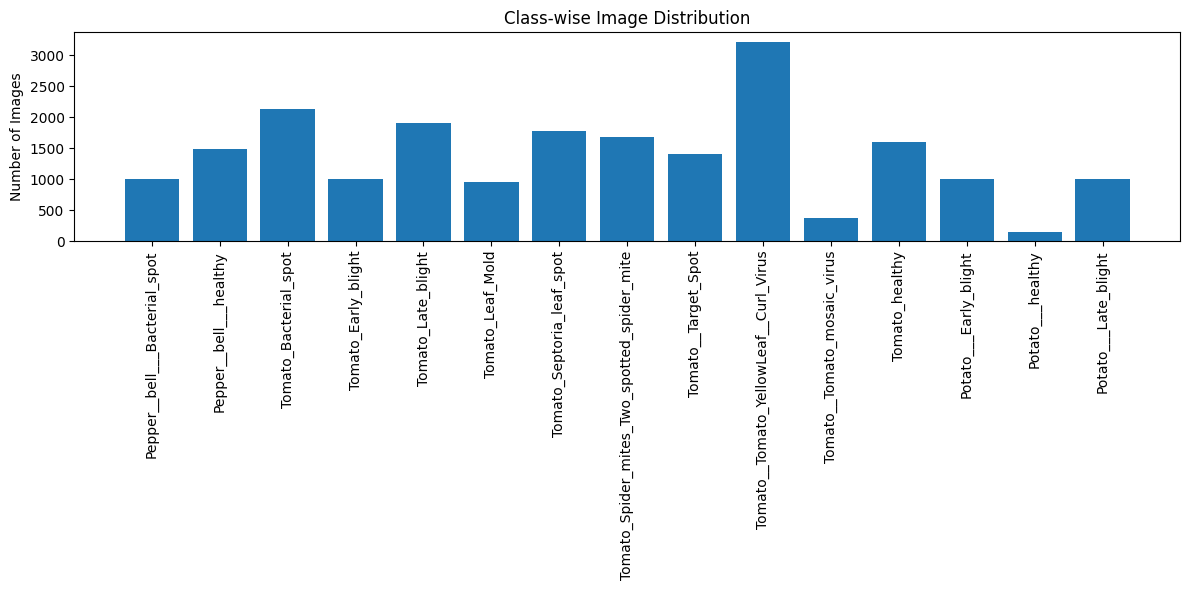

In [13]:
class_counts = {
    cls: len(os.listdir(os.path.join(data_dir, cls)))
    for cls in classes
}

plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.title("Class-wise Image Distribution")
plt.tight_layout()
plt.show()
    

PyTorch Training Pipeline

In [14]:
classes

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight']

In [15]:
# class CNN(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.features=nn.Sequential(
#             nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2,stride=2),
#             nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2,stride=2),
#             nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2,stride=2),
#             nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2,stride=2),
#             nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,stride=1,padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2,stride=2),
#             nn.Conv2d(in_channels=512,out_channels=1024,kernel_size=3,stride=1,padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2,stride=2),
#         )
#         self.classifier=nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(in_features=1024*3*3,out_features=256),
#             nn.ReLU(),
#             nn.Linear(in_features=256,out_features=128),
#             nn.ReLU(),
#             nn.Linear(in_features=128,out_features=64),
#             nn.ReLU(),
#             nn.Linear(in_features=64,out_features=32),
#             nn.ReLU(),
#             nn.Linear(in_features=32,out_features=3)
#         )
#     def forward(self,x):
#         x=self.features(x)
#         x=self.classifier(x)
#         return x



class CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


In [16]:
num_classes = len(classes)
num_classes

15

Training Parameters

In [17]:
model = CNN(num_classes)
model.to(device)

CNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
  )
  (gap): AdaptiveAvgPool2d(output_size=1)
  (classifier): Linear(in_features=128, out_features=15, bias=True)
)

In [18]:
criterion = nn.CrossEntropyLoss()   # correct for multi-class
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [19]:
batch_features,batch_labels=next(iter(train_loader))
batch_features.shape,batch_labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [20]:
epochs=15

Training loop

10 ephocs 

In [21]:
# %pip install tqdm

In [22]:
# %pip install scikit-learn

In [23]:
criterion = nn.CrossEntropyLoss()   # correct for multi-class
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode="min",
    factor=0.5,
    patience=2
)


epochs = 20
patience = 4
best_val_loss = float("inf")
counter = 0

from tqdm import tqdm
import time
from sklearn.metrics import classification_report

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(epochs):
    start_time = time.time()

    # ================= TRAINING =================
    model.train()
    total_epoch_loss = 0.0
    correct = 0
    total = 0

    for batch_features, batch_labels in tqdm(
        train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]"
    ):
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()

        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)

        loss.backward()

        # Gradient clipping (stability)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        total_epoch_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

    avg_train_loss = total_epoch_loss / len(train_loader)
    train_accuracy = 100 * correct / total

    train_loss_list.append(avg_train_loss)
    train_acc_list.append(train_accuracy)

    # ================= VALIDATION =================
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for val_features, val_labels in tqdm(
            val_loader, desc=f"Epoch {epoch+1}/{epochs} [Val]"
        ):
            val_features = val_features.to(device)
            val_labels = val_labels.to(device)

            val_outputs = model(val_features)
            v_loss = criterion(val_outputs, val_labels)

            val_loss += v_loss.item()

            _, v_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (v_predicted == val_labels).sum().item()

            all_preds.extend(v_predicted.cpu().numpy())
            all_labels.extend(val_labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total

    val_loss_list.append(avg_val_loss)
    val_acc_list.append(val_accuracy)

    # Scheduler step
    scheduler.step(avg_val_loss)

    # ================= EARLY STOPPING =================
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
        torch.save(model.state_dict(), "agriculture_model.pth")
    else:
        counter += 1

    epoch_time = time.time() - start_time

    # ================= LOGGING =================
    print(
        f"Epoch [{epoch+1}/{epochs}] "
        f"- Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% "
        f"- Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}% "
        f"- Time: {epoch_time:.2f}s"
    )

    if counter >= patience:
        print("Early stopping triggered")
        break
# ================= FINAL EVALUATION =================
print("\nClassification Report (Validation Set):")
print(classification_report(all_labels, all_preds, target_names=classes))


Epoch 1/20 [Val]: 100%|██████████| 129/129 [00:11<00:00, 10.86it/s]


Epoch [1/20] - Train Loss: 1.2713, Train Acc: 63.08% - Val Loss: 0.8591, Val Acc: 76.02% - Time: 75.90s


Epoch 2/20 [Val]: 100%|██████████| 129/129 [00:12<00:00, 10.57it/s]


Epoch [2/20] - Train Loss: 0.7845, Train Acc: 76.46% - Val Loss: 0.6820, Val Acc: 79.36% - Time: 75.86s


Epoch 3/20 [Val]: 100%|██████████| 129/129 [00:13<00:00,  9.31it/s]


Epoch [3/20] - Train Loss: 0.6399, Train Acc: 80.33% - Val Loss: 0.5515, Val Acc: 83.16% - Time: 81.70s


Epoch 4/20 [Val]: 100%|██████████| 129/129 [00:09<00:00, 13.74it/s]


Epoch [4/20] - Train Loss: 0.5666, Train Acc: 82.22% - Val Loss: 0.5468, Val Acc: 82.85% - Time: 78.96s


Epoch 5/20 [Val]: 100%|██████████| 129/129 [00:08<00:00, 14.48it/s]


Epoch [5/20] - Train Loss: 0.4997, Train Acc: 84.14% - Val Loss: 0.4644, Val Acc: 85.25% - Time: 63.94s


Epoch 6/20 [Val]: 100%|██████████| 129/129 [00:09<00:00, 14.28it/s]


Epoch [6/20] - Train Loss: 0.4556, Train Acc: 85.75% - Val Loss: 0.4001, Val Acc: 87.84% - Time: 65.39s


Epoch 7/20 [Val]: 100%|██████████| 129/129 [00:09<00:00, 13.90it/s]


Epoch [7/20] - Train Loss: 0.4146, Train Acc: 86.80% - Val Loss: 0.4376, Val Acc: 86.70% - Time: 65.15s


Epoch 8/20 [Val]: 100%|██████████| 129/129 [00:09<00:00, 14.31it/s]


Epoch [8/20] - Train Loss: 0.3871, Train Acc: 88.13% - Val Loss: 0.3422, Val Acc: 88.88% - Time: 65.22s


Epoch 9/20 [Val]: 100%|██████████| 129/129 [00:08<00:00, 14.37it/s]


Epoch [9/20] - Train Loss: 0.3533, Train Acc: 89.20% - Val Loss: 0.2905, Val Acc: 90.94% - Time: 64.25s


Epoch 10/20 [Val]: 100%|██████████| 129/129 [00:08<00:00, 14.38it/s]


Epoch [10/20] - Train Loss: 0.3285, Train Acc: 89.88% - Val Loss: 0.2710, Val Acc: 91.64% - Time: 65.36s


Epoch 11/20 [Val]: 100%|██████████| 129/129 [00:08<00:00, 14.41it/s]


Epoch [11/20] - Train Loss: 0.3019, Train Acc: 90.36% - Val Loss: 0.3553, Val Acc: 87.98% - Time: 63.68s


Epoch 12/20 [Val]: 100%|██████████| 129/129 [00:09<00:00, 13.99it/s]


Epoch [12/20] - Train Loss: 0.2888, Train Acc: 91.00% - Val Loss: 0.3091, Val Acc: 90.38% - Time: 64.88s


Epoch 13/20 [Val]: 100%|██████████| 129/129 [00:08<00:00, 14.37it/s]


Epoch [13/20] - Train Loss: 0.2675, Train Acc: 91.51% - Val Loss: 0.3031, Val Acc: 89.75% - Time: 64.84s


Epoch 14/20 [Val]: 100%|██████████| 129/129 [00:08<00:00, 14.60it/s]


Epoch [14/20] - Train Loss: 0.2172, Train Acc: 93.38% - Val Loss: 0.1811, Val Acc: 94.36% - Time: 64.05s


Epoch 15/20 [Val]: 100%|██████████| 129/129 [00:09<00:00, 13.49it/s]


Epoch [15/20] - Train Loss: 0.2113, Train Acc: 93.26% - Val Loss: 0.1501, Val Acc: 95.28% - Time: 64.83s


Epoch 16/20 [Val]: 100%|██████████| 129/129 [00:09<00:00, 13.29it/s]


Epoch [16/20] - Train Loss: 0.2005, Train Acc: 93.76% - Val Loss: 0.1804, Val Acc: 94.19% - Time: 66.05s


Epoch 17/20 [Val]: 100%|██████████| 129/129 [00:10<00:00, 12.88it/s]


Epoch [17/20] - Train Loss: 0.1937, Train Acc: 94.04% - Val Loss: 0.1560, Val Acc: 95.28% - Time: 66.88s


Epoch 18/20 [Val]: 100%|██████████| 129/129 [00:09<00:00, 13.35it/s]


Epoch [18/20] - Train Loss: 0.1871, Train Acc: 94.26% - Val Loss: 0.1554, Val Acc: 95.35% - Time: 64.51s


Epoch 19/20 [Val]: 100%|██████████| 129/129 [00:10<00:00, 12.68it/s]


Epoch [19/20] - Train Loss: 0.1624, Train Acc: 95.09% - Val Loss: 0.1305, Val Acc: 96.22% - Time: 68.29s


Epoch 20/20 [Val]: 100%|██████████| 129/129 [00:09<00:00, 13.49it/s]

Epoch [20/20] - Train Loss: 0.1569, Train Acc: 95.20% - Val Loss: 0.1157, Val Acc: 96.44% - Time: 65.67s

Classification Report (Validation Set):
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.97      0.97      0.97       188
                     Pepper__bell___healthy       0.99      0.99      0.99       307
                      Tomato_Bacterial_spot       0.97      1.00      0.98       214
                        Tomato_Early_blight       0.93      0.95      0.94       211
                         Tomato_Late_blight       1.00      0.87      0.93        30
                           Tomato_Leaf_Mold       0.98      0.97      0.98       448
                  Tomato_Septoria_leaf_spot       0.92      0.87      0.89       196
Tomato_Spider_mites_Two_spotted_spider_mite       0.95      0.93      0.94       361
                        Tomato__Target_Spot       0.99      0.97      0.98       191
   

In [24]:
model.eval()  # turn off dropout, batchnorm, etc.

CNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
  )
  (gap): AdaptiveAvgPool2d(output_size=1)
  (classifier): Linear(in_features=128, out_features=15, bias=True)
)

In [25]:
# for epoch in range(epochs):
#     total_epoch_loos=0

#     for batch_features,batch_labels in train_loader:

#         # MOve the data to GPU
#         batch_features=batch_features.to(device)
#         batch_labels=batch_labels.to(device)

#         # forwares pass
#         outputs=model(batch_features)
#         # Calculate the loss
#         loss=criterion(outputs,batch_labels)
#         # Backpropagation
#         optimizer.zero_grad()
#         loss.backward()

#         #update grads

#         optimizer.step()
        
#         total_epoch_loos+=loss.item()
#     average_epoch_loss=total_epoch_loos/len(train_loader)
#     print(f"Epoch {epoch+1}/{epochs}, Loss: {average_epoch_loss}")
        

20 epochs

In [26]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X, y in val_loader:
        # MOve the data to the same device as the model
        X = X.to(device)
        y = y.to(device)
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

accuracy = 100 * correct / total
print("Validation Accuracy:", accuracy)


Validation Accuracy: 96.56007751937985


In [27]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X, y in train_loader:
        # MOve the data to the same device as the model
        X = X.to(device)
        y = y.to(device)
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

accuracy = 100 * correct / total
print("Validation Accuracy:", accuracy)


Validation Accuracy: 96.80193821926106


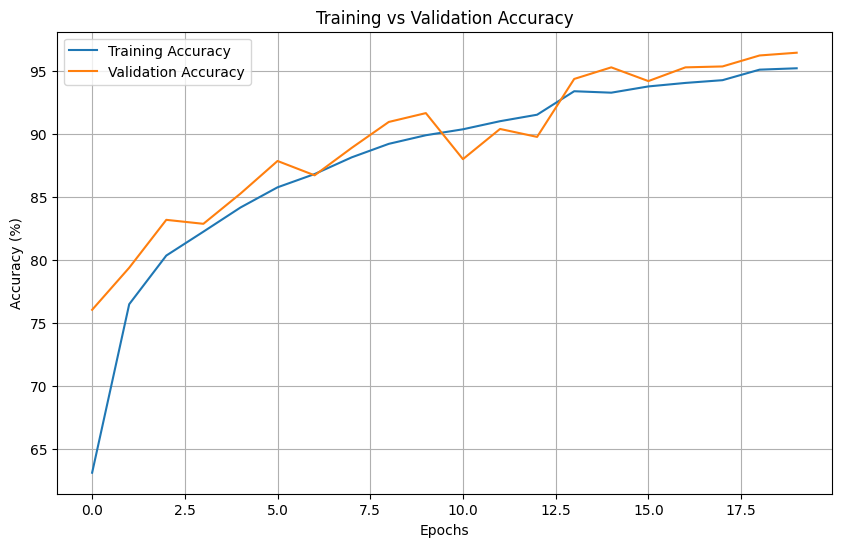

In [28]:
plt.figure(figsize=(10,6))
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(val_acc_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

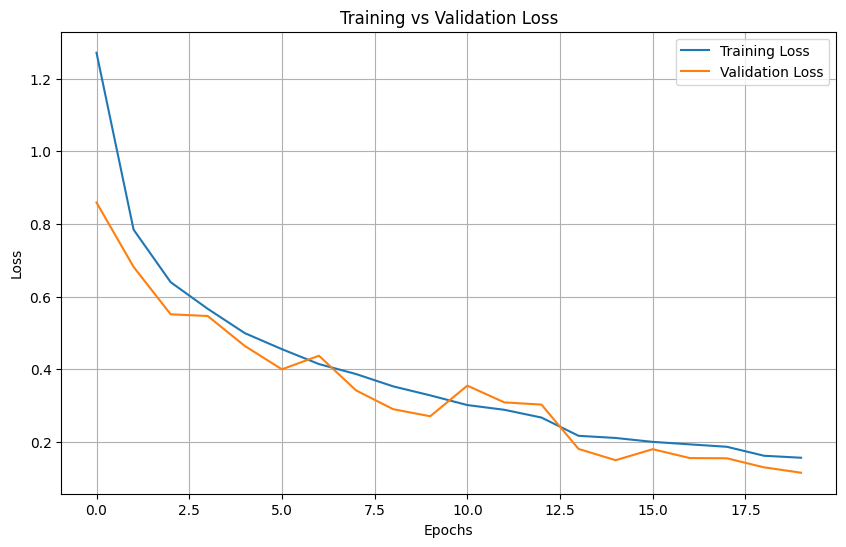

In [29]:
plt.figure(figsize=(10,6))
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
cm = confusion_matrix(all_labels, all_preds)
cm


array([[184,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   2,
          0,   0],
       [  1, 305,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0],
       [  0,   0, 213,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1, 202,   0,   0,   2,   3,   0,   0,   1,   2,   0,
          0,   0],
       [  0,   0,   0,   0,  29,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 434,   0,   3,   0,   0,   0,   1,  10,
          0,   0],
       [  0,   0,   1,   2,   0,   4, 172,   7,   0,   1,   0,   6,   3,
          0,   0],
       [  0,   2,   4,   7,   0,   1,   8, 334,   0,   0,   0,   1,   4,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2, 187,   1,   0,   0,   1,
          0,   0],
       [  1,   0,   3,   1,   0,   0,   3,   1,   1, 334,   2,   0,   1,
          2,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 331,   2,   3,
       

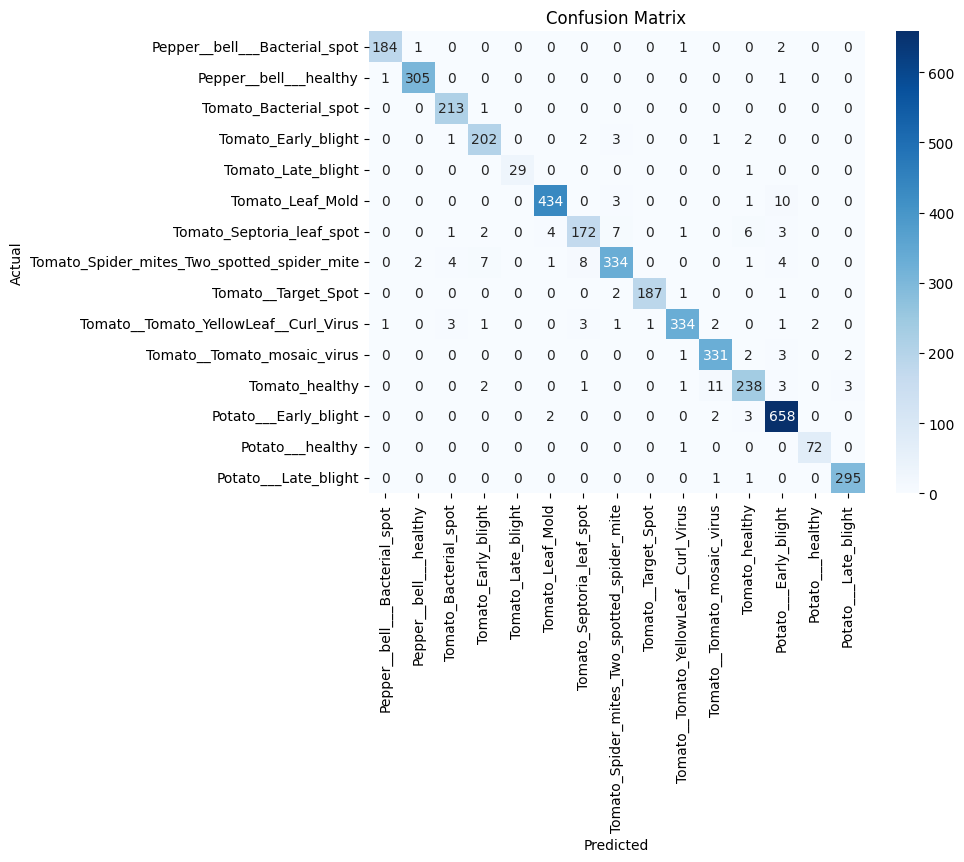

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

In [35]:
# torch.save(model.state_dict(), "potato_model.pth")


In [36]:
model = CNN(len(classes))                      # your CNN class
model.load_state_dict(torch.load("agriculture_model.pth", map_location="cpu"))
model.eval()

/tmp/ipykernel_98283/3175924849.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("agriculture_model.pth", map_location="cpu"))


CNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
  )
  (gap): AdaptiveAvgPool2d(output_size=1)
  (classifier): Linear(in_features=128, out_features=15, bias=True)
)

In [37]:
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
# Prediction function
def predict(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # add batch dimension

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    print(f"\n🧠 Predicted : {classes[predicted.item()]}")
    return classes[predicted.item()]

# Example usage


In [ ]:
predict("/home/aastha_same/Documents/Project to learn/Agriculture_Potato_Disease_Classification_1/Agriculture_Potato_Disease_classification/model_training/lateblight.JPG")


🧠 Predicted : Tomato_Early_blight


'Tomato_Early_blight'